In [1]:
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
import datetime
import textwrap
import seaborn as sns

%matplotlib inline

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
colors = ['7A76C2', 'ff6e9c98', 'f62196', '18c0c4', 'f3907e', '66E9EC']

In [2]:
plt.style.use('seaborn-whitegrid')

# Acceso a los datos

In [3]:
df_el = pd.read_csv('../data/processed/lowcost_analysis/Elichens_sinespurios.csv', index_col=0)
df_ec = pd.read_csv('../data/processed/lowcost_analysis/Ecomesure_sinespurios.csv', index_col=0)
df_simaj = pd.read_csv('../data/processed/lowcost_analysis/SIMAJ_sinespurios.csv', index_col=0)
df_stfe = pd.read_csv('../data/processed/lowcost_analysis/SIMAJ_sfe_hora_sinespurios.csv', index_col=0)
df_tr = pd.read_csv('../data/processed/lowcost_analysis/ThermoADR_hora_sinespurios.csv', index_col=0)

### EcoMesure

In [4]:
print('Shape for df is:',df_ec.shape)
df_ec.head(5)

Shape for df is: (1464, 12)


,datetime,Temp,RH,Pressure,NO2,O3,COV,PM 1,PM 2.5,PM10,NO2 inst,O3 inst
0,01/05/2021 00:00,21.980933,48.364750,837.900483,0.052561,0.015125,251.676250,53.96435,62.837083,83.145633,88.101435,30.656555
1,01/05/2021 01:00,21.559700,48.714200,837.936067,0.042263,0.014507,254.162583,40.52325,47.649433,62.513467,82.363239,29.973251
2,01/05/2021 02:00,21.053500,50.831667,838.075933,0.041504,0.023263,258.541500,42.21685,49.499433,60.570667,76.980785,49.961045
3,01/05/2021 03:00,20.082533,52.719883,837.796417,0.040025,0.034681,260.714050,38.87770,44.843333,54.601133,76.395524,67.864966
4,01/05/2021 04:00,19.224983,52.682750,837.298850,0.038760,0.023763,261.577267,40.53875,45.983250,56.280733,72.397217,37.998888


### Elichens

In [5]:
print('Shape for df is:',df_el.shape)
df_el.head(5)

Shape for df is: (1464, 17)


,datetime,date,PM2_5,PM10,PM1_0,CO2,pressure,humidity,battery,lux,dB,run_time,mslPressure,temperature_int,temperature,NO2,O3
0,01/05/2021 05:00,1.619847e+09,17.000000,18.000000,7.000000,300.000000,840.90,55.60,2500,0.0,53.0,36000,840.90,21.475000,21.825000,0.008781,0.013597
1,01/05/2021 06:00,1.619851e+09,16.000000,16.000000,6.500000,315.000000,840.90,58.85,2500,0.0,51.5,39600,840.90,20.266667,20.516667,0.008642,0.008214
2,01/05/2021 07:00,1.619854e+09,14.333333,14.333333,6.333333,326.666667,840.85,66.25,2500,0.0,49.0,43200,840.85,19.000000,19.140000,0.008503,0.002556
3,01/05/2021 08:00,1.619858e+09,14.666667,14.666667,6.333333,320.000000,840.65,70.80,2500,0.0,49.5,46800,840.65,17.925000,18.075000,0.008387,0.000000
4,01/05/2021 09:00,1.619862e+09,12.666667,12.666667,5.333333,310.000000,840.40,67.65,2500,0.0,49.5,50400,840.40,17.433333,17.633333,0.008335,0.000000


### SIMAJ - Vallarta

In [6]:
print('Shape for df is',df_simaj.shape)
df_simaj.head(5)

Shape for df is (1465, 47)


,datetime,O3,STATUS,NO,STATUS2,NO2,STATUS3,NOX,STATUS4,SO2,...,NOX2,STATUS18,SO22,STATUS19,CO2,STATUS20,PM2.5 Digital,UV,UVI,STATUS21
0,01/05/2021 00:00,0.015,144,0.004,144,0.012,144,0.015,144,0.0019,...,0.015,144,0.0021,151,0.651,144,7,7,0.22,151
1,01/05/2021 01:00,0.015,144,0.003,144,0.011,144,0.013,144,0.0007,...,0.012,144,0.0009,144,0.630,144,0,0,0.22,151
2,01/05/2021 02:00,0.015,144,0.003,144,0.008,144,0.011,144,0.0003,...,0.011,144,0.0004,144,0.647,144,0,0,0.22,151
3,01/05/2021 03:00,0.014,144,0.002,144,0.009,144,0.011,144,0.0005,...,0.010,144,0.0007,144,0.637,144,0,0,0.22,151
4,01/05/2021 04:00,0.015,144,0.002,144,0.007,144,0.009,144,0.0004,...,0.008,144,0.0005,144,0.616,144,0,0,0.22,151


### SIMAJ - Santa Fe

In [7]:
df_stfe.rename(columns={'PM 10':'PM10'}, inplace=True)
print('Shape for df is',df_stfe.shape)
df_stfe.head(5)

Shape for df is (697, 25)


,datetime,CO,CO Estado,PM10,PM 10 Estado,Temp Int,Temp Int Estado,Temp Ext,Temp Ext Estado,RH,...,Precipitacion,Precipitacion Estado,Radiacion Solar,Radiacion Solar Estado,Presion barometrica,Presion barometrica Estado,PM 2.5,PM 2.5 Estado,CO.1,CO Estado.1
0,26/06/2021 00:00,0.74173,144.0,19.337,144.0,25.416,144.0,18.338,144.0,82.502,...,0.0,144.0,1.7217,144.0,628.30,144.0,9.070,144.00,0.78158,134.6
1,26/06/2021 01:00,0.84483,144.0,18.547,144.0,25.474,144.0,18.758,144.0,80.793,...,0.0,144.0,1.5417,144.0,628.66,144.0,14.659,144.00,0.88455,144.0
2,26/06/2021 02:00,0.56007,139.2,27.019,139.2,25.431,139.2,17.973,139.2,82.528,...,0.0,139.2,1.5600,139.2,628.11,139.2,10.959,139.32,0.60170,139.2
3,26/06/2021 03:00,0.42257,144.0,23.568,144.0,25.380,144.0,17.888,144.0,80.833,...,0.0,144.0,1.3883,144.0,627.03,144.0,15.742,144.00,0.46622,144.0
4,26/06/2021 04:00,0.47525,144.0,28.873,144.0,25.291,144.0,17.692,144.0,81.425,...,0.0,144.0,1.3783,144.0,626.50,144.0,13.458,144.00,0.51725,144.0


### ThermoADR

In [8]:
print('Shape for df is',df_tr.shape)
df_tr.head(5)

Shape for df is (576, 5)


,datetime,PM10,Temp,RHumidity,AtmoPressure
1.0,29/06/2021 15:00,6.83120,28.502,41.980,634.00
2.0,29/06/2021 16:00,2.54130,29.302,40.667,634.00
3.0,29/06/2021 17:00,2.68930,28.672,42.183,633.80
4.0,29/06/2021 18:00,1.26170,31.095,36.650,633.83
5.0,29/06/2021 19:00,0.99017,31.482,35.350,632.97


# Tratamiento de datos

In [9]:
espurios = {}

### Elichens

In [10]:
df_el['datetime'] = pd.to_datetime(df_el['datetime'], format='%d/%m/%Y %H:%M')

#contador de espurios por contaminante
o3 = len(df_el.loc[df_el['O3']==0])
pm10 = len(df_el.loc[df_el['PM10']==0])
no2 = len(df_el.loc[df_el['NO2']==0]) + len(df_el.loc[df_el['NO2']>0.2])

espurios['elichens'] = [o3, pm10, no2]

df_el[['O3', 'PM10','NO2']] = df_el[['O3', 'PM10','NO2']].replace(0,np.nan)

df_el.loc[df_el.NO2>0.2] = np.nan

print(df_el.shape)
df_el.head(5)

(1464, 17)


,datetime,date,PM2_5,PM10,PM1_0,CO2,pressure,humidity,battery,lux,dB,run_time,mslPressure,temperature_int,temperature,NO2,O3
0,2021-05-01 05:00:00,1.619847e+09,17.000000,18.000000,7.000000,300.000000,840.90,55.60,2500.0,0.0,53.0,36000.0,840.90,21.475000,21.825000,0.008781,0.013597
1,2021-05-01 06:00:00,1.619851e+09,16.000000,16.000000,6.500000,315.000000,840.90,58.85,2500.0,0.0,51.5,39600.0,840.90,20.266667,20.516667,0.008642,0.008214
2,2021-05-01 07:00:00,1.619854e+09,14.333333,14.333333,6.333333,326.666667,840.85,66.25,2500.0,0.0,49.0,43200.0,840.85,19.000000,19.140000,0.008503,0.002556
3,2021-05-01 08:00:00,1.619858e+09,14.666667,14.666667,6.333333,320.000000,840.65,70.80,2500.0,0.0,49.5,46800.0,840.65,17.925000,18.075000,0.008387,NaN
4,2021-05-01 09:00:00,1.619862e+09,12.666667,12.666667,5.333333,310.000000,840.40,67.65,2500.0,0.0,49.5,50400.0,840.40,17.433333,17.633333,0.008335,NaN


### EcoMesure

In [11]:
df_ec['datetime'] = pd.to_datetime(df_ec['datetime'], format='%d/%m/%Y %H:%M')

#contador de espurios por contaminante
o3 = len(df_ec.loc[df_ec['O3']==0])
pm10 = len(df_ec.loc[df_ec['PM10']==0]) + len(df_ec.loc[df_ec['PM10']>500])
no2 = len(df_ec.loc[df_ec['NO2']==0])

espurios['ecomesure'] = [o3, pm10, no2]

df_ec[['O3', 'PM10','NO2']] = df_ec[['O3', 'PM10','NO2']].replace(0,np.nan)

df_ec.loc[df_ec.PM10>500] = np.nan

print(df_ec.shape)
df_ec.head(5)

(1464, 12)


,datetime,Temp,RH,Pressure,NO2,O3,COV,PM 1,PM 2.5,PM10,NO2 inst,O3 inst
0,2021-05-01 00:00:00,21.980933,48.364750,837.900483,0.052561,0.015125,251.676250,53.96435,62.837083,83.145633,88.101435,30.656555
1,2021-05-01 01:00:00,21.559700,48.714200,837.936067,0.042263,0.014507,254.162583,40.52325,47.649433,62.513467,82.363239,29.973251
2,2021-05-01 02:00:00,21.053500,50.831667,838.075933,0.041504,0.023263,258.541500,42.21685,49.499433,60.570667,76.980785,49.961045
3,2021-05-01 03:00:00,20.082533,52.719883,837.796417,0.040025,0.034681,260.714050,38.87770,44.843333,54.601133,76.395524,67.864966
4,2021-05-01 04:00:00,19.224983,52.682750,837.298850,0.038760,0.023763,261.577267,40.53875,45.983250,56.280733,72.397217,37.998888


### SIMAJ - Vallarta

In [12]:
df_simaj['datetime'] = pd.to_datetime(df_simaj['datetime'], format='%d/%m/%Y %H:%M')

#contador de espurios por contaminante
o3 = len(df_simaj.loc[df_simaj['O3']==0])
pm10 = len(df_simaj.loc[df_simaj['PM10']==0])
no2 = len(df_simaj.loc[df_simaj['NO2']==0])

espurios['simaj'] = [o3, pm10, no2]

df_simaj[['O3', 'PM10','NO2']] = df_simaj[['O3', 'PM10','NO2']].replace(0,np.nan)

print(df_simaj.shape)
df_simaj.head(5)

(1465, 47)


,datetime,O3,STATUS,NO,STATUS2,NO2,STATUS3,NOX,STATUS4,SO2,...,NOX2,STATUS18,SO22,STATUS19,CO2,STATUS20,PM2.5 Digital,UV,UVI,STATUS21
0,2021-05-01 00:00:00,0.015,144,0.004,144,0.012,144,0.015,144,0.0019,...,0.015,144,0.0021,151,0.651,144,7,7,0.22,151
1,2021-05-01 01:00:00,0.015,144,0.003,144,0.011,144,0.013,144,0.0007,...,0.012,144,0.0009,144,0.630,144,0,0,0.22,151
2,2021-05-01 02:00:00,0.015,144,0.003,144,0.008,144,0.011,144,0.0003,...,0.011,144,0.0004,144,0.647,144,0,0,0.22,151
3,2021-05-01 03:00:00,0.014,144,0.002,144,0.009,144,0.011,144,0.0005,...,0.010,144,0.0007,144,0.637,144,0,0,0.22,151
4,2021-05-01 04:00:00,0.015,144,0.002,144,0.007,144,0.009,144,0.0004,...,0.008,144,0.0005,144,0.616,144,0,0,0.22,151


### SIMAJ - Santa Fe

In [13]:
df_stfe['datetime'] = pd.to_datetime(df_stfe['datetime'], format='%d/%m/%Y %H:%M')

#contador de espurios por contaminante
pm10 = len(df_stfe.loc[df_stfe['PM10']==0])

espurios['simaj_sfe'] = [pm10]

df_stfe[['PM10']] = df_stfe[['PM10']].replace(0,np.nan)
df_stfe.loc[df_stfe.PM10>200] = np.nan

print(df_stfe.shape)
df_stfe.head(5)

(697, 25)


,datetime,CO,CO Estado,PM10,PM 10 Estado,Temp Int,Temp Int Estado,Temp Ext,Temp Ext Estado,RH,...,Precipitacion,Precipitacion Estado,Radiacion Solar,Radiacion Solar Estado,Presion barometrica,Presion barometrica Estado,PM 2.5,PM 2.5 Estado,CO.1,CO Estado.1
0,2021-06-26 00:00:00,0.74173,144.0,19.337,144.0,25.416,144.0,18.338,144.0,82.502,...,0.0,144.0,1.7217,144.0,628.30,144.0,9.070,144.00,0.78158,134.6
1,2021-06-26 01:00:00,0.84483,144.0,18.547,144.0,25.474,144.0,18.758,144.0,80.793,...,0.0,144.0,1.5417,144.0,628.66,144.0,14.659,144.00,0.88455,144.0
2,2021-06-26 02:00:00,0.56007,139.2,27.019,139.2,25.431,139.2,17.973,139.2,82.528,...,0.0,139.2,1.5600,139.2,628.11,139.2,10.959,139.32,0.60170,139.2
3,2021-06-26 03:00:00,0.42257,144.0,23.568,144.0,25.380,144.0,17.888,144.0,80.833,...,0.0,144.0,1.3883,144.0,627.03,144.0,15.742,144.00,0.46622,144.0
4,2021-06-26 04:00:00,0.47525,144.0,28.873,144.0,25.291,144.0,17.692,144.0,81.425,...,0.0,144.0,1.3783,144.0,626.50,144.0,13.458,144.00,0.51725,144.0


### ThermoADR

In [14]:
df_tr['datetime'] = pd.to_datetime(df_tr['datetime'], format='%d/%m/%Y %H:%M')

#contador de espurios por contaminante
pm10 = len(df_tr.loc[df_tr['PM10']==0])

espurios['thermo'] = [pm10]

df_tr[['PM10']] = df_tr[['PM10']].replace(0,np.nan)

print(df_tr.shape)
df_tr.head(5)

(576, 5)


,datetime,PM10,Temp,RHumidity,AtmoPressure
1.0,2021-06-29 15:00:00,6.83120,28.502,41.980,634.00
2.0,2021-06-29 16:00:00,2.54130,29.302,40.667,634.00
3.0,2021-06-29 17:00:00,2.68930,28.672,42.183,633.80
4.0,2021-06-29 18:00:00,1.26170,31.095,36.650,633.83
5.0,2021-06-29 19:00:00,0.99017,31.482,35.350,632.97


In [15]:
espurios

{'elichens': [157, 83, 43],
 'ecomesure': [0, 74, 0],
 'simaj': [38, 45, 38],
 'simaj_sfe': [0],
 'thermo': [1]}

# Visualización

In [16]:
def grap_comparison(df_simaj, df_electronic, param, name, save=False):
    fig, ax = plt.subplots(figsize=(16,7))
    
    ax.scatter(df_simaj.datetime, df_simaj[param], zorder=1, label='SIMAJ')
    ax.plot(df_simaj.datetime, df_simaj[param], '--', zorder=2, color='white', alpha=0.2)

    ax.scatter(df_electronic.datetime, df_electronic[param], zorder=1, color='#f3907e', label='Electronic sensor', alpha=1)
    ax.plot(df_electronic.datetime, df_electronic[param], '--', zorder=2, color='white', alpha=0.2)
    
    ax.legend()
    
    fig.suptitle(f'{param} SIMAJ vs {name}', fontsize=18)
    
    if save==True:
        plt.savefig(f'../output/figures/lowcost_sensor/{name}_Simaj_{param}_comparison.png',dpi=150)

    return plt.show()

In [17]:
def grap_comparison(df_simaj, df_electronic, param, name, save=False):
    fig, ax = plt.subplots(figsize=(16,7))
    
    df_merge = pd.merge(df_simaj[['datetime', param]], 
                        df_electronic[['datetime', param]], on='datetime', how='left')
    
    df_merge = df_merge.dropna()
    
    ax.scatter(df_merge.datetime, df_merge[param+'_x'], zorder=1, label='SIMAJ')
    ax.plot(df_merge.datetime, df_merge[param+'_x'], '--', zorder=2, color='white', alpha=0.2)

    ax.scatter(df_merge.datetime, df_merge[param+'_y'], zorder=1, color='#f3907e', label='Electronic sensor', alpha=1)
    ax.plot(df_merge.datetime, df_merge[param+'_y'], '--', zorder=2, color='white', alpha=0.2)
    
    ax.legend()
    
    
    if param == 'PM10':
        plt.ylabel('$PM_{10}$ (μg/m³)', fontsize=12)
    elif param == 'O3':
        plt.ylabel('$O_{3}$ (ppm)', fontsize=12)
    elif param == 'NO2':
        plt.ylabel('$NO_{2}$ (ppm)', fontsize=12)
    
    plt.xlabel('Fecha', fontsize=12)
    
    fig.suptitle(f'{param} SIMAJ vs {name}', fontsize=18)
    
    if save==True:
        plt.savefig(f'../output/figures/lowcost_sensor/{name}_Simaj_{param}_comparison.png',dpi=150)

    return plt.show()

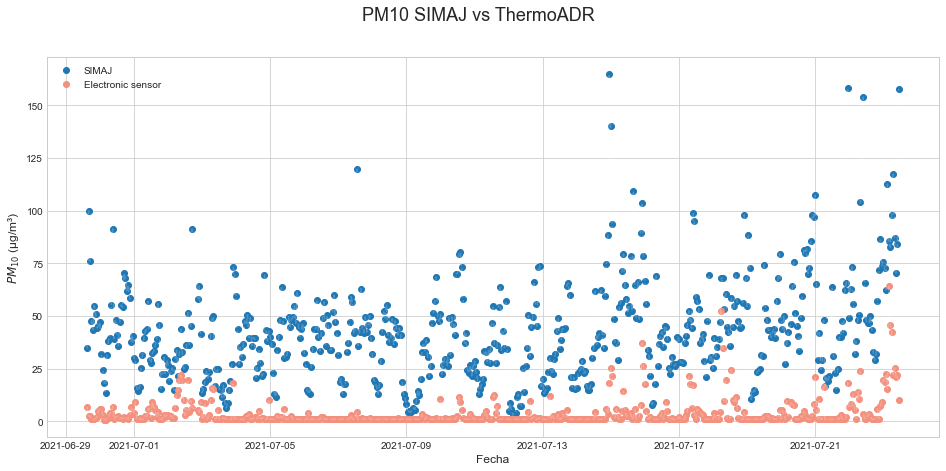

In [18]:
param = ['PM10']
for p in param:
    grap_comparison(df_stfe, df_tr, p, 'ThermoADR', save=True)

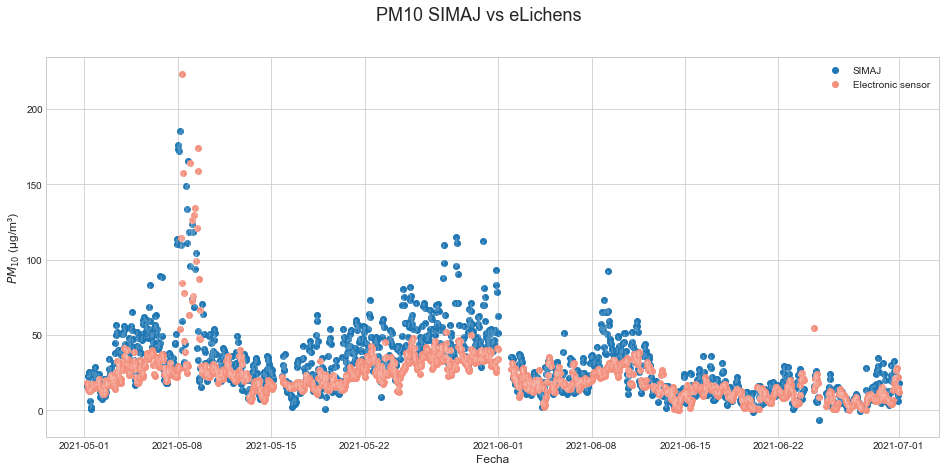

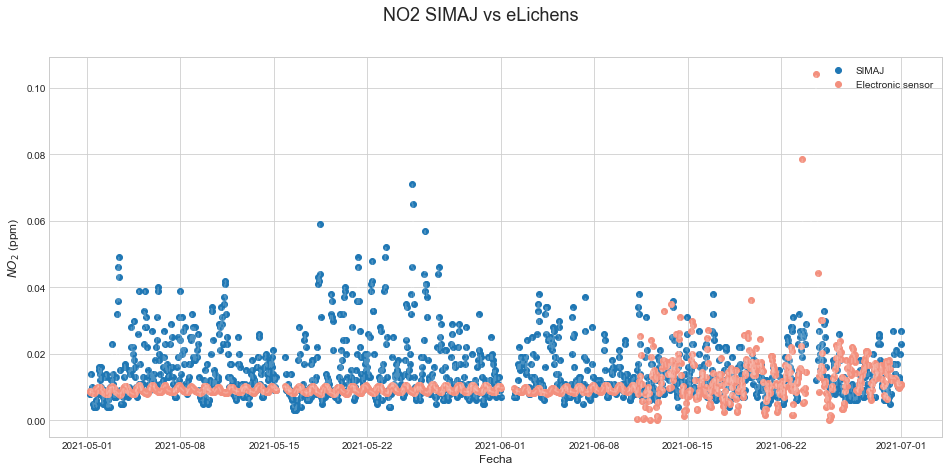

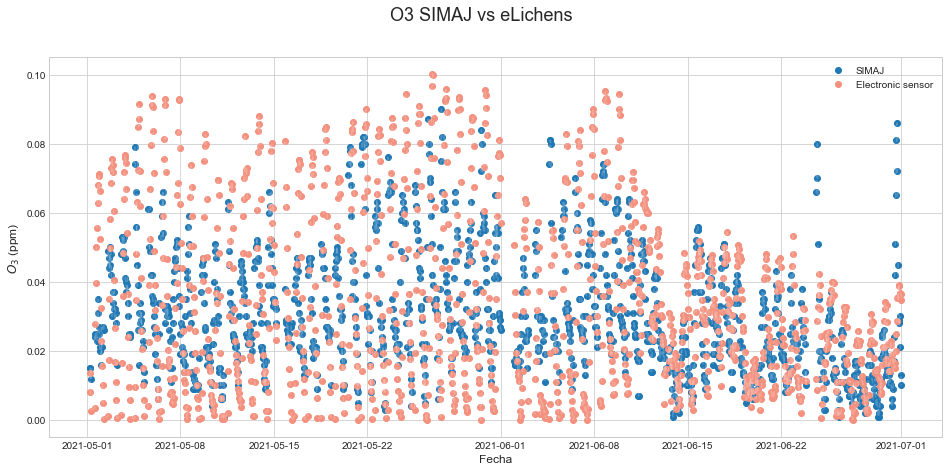

In [19]:
param = ['PM10','NO2','O3']
for p in param:
    grap_comparison(df_simaj, df_el, p, 'eLichens', save=True)

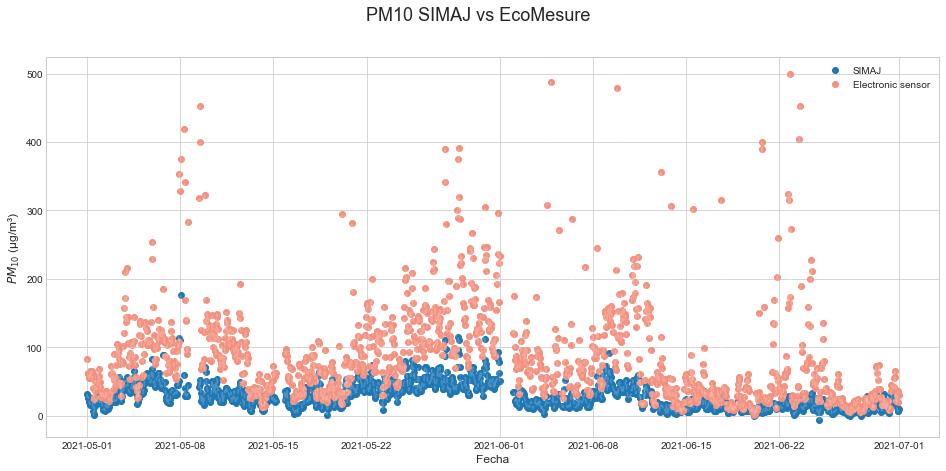

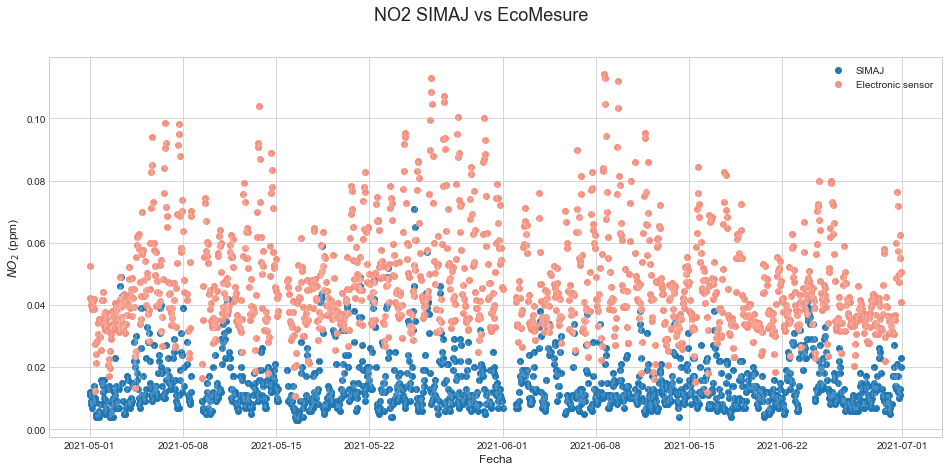

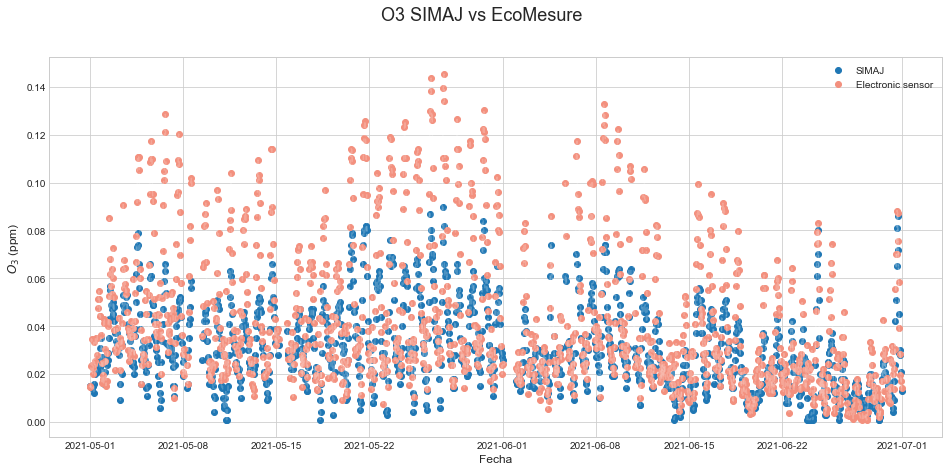

In [20]:
param = ['PM10','NO2','O3']
for p in param:
    grap_comparison(df_simaj, df_ec, p, 'EcoMesure', save=True)

# Análisis estadístico

In [19]:
def statistical_analysis(df_simaj, df_electronic, param):
    
    df_merge = pd.merge(df_simaj[['datetime', param]], 
                        df_electronic[['datetime', param]], on='datetime', how='left')
    
    df_merge = df_merge.dropna()
    coef_pearson, p = stats.pearsonr(df_merge[param+'_x'], df_merge[param+'_y'])
    coef_pearson = round(coef_pearson,3)
    rmse = round(mean_squared_error(df_merge[param+'_x'], df_merge[param+'_y'], squared=False), 3)
    num = (((df_merge[param+'_y']-df_merge[param+'_x'])**2).sum())
    den = ((abs(df_merge[param+'_y']-df_merge[param+'_x'].mean()) + 
            abs(df_merge[param+'_x']-df_merge[param+'_x'].mean()))**2).sum()
    ia = round(1 - (num / den),3)
    
    df_merge['res'] = (df_merge[param+'_x'] - df_merge[param+'_y'])
    
    mean_simaj = round(df_merge[param+'_x'].mean(),3)
    mean_res = round(df_merge['res'].mean(),3)
    std_res = round(df_merge['res'].std(),3)
    
    
    return coef_pearson, rmse, ia, mean_simaj, mean_res, std_res

In [22]:
df_merge = pd.merge(df_simaj[['datetime', 'PM10']], 
                        df_ec[['datetime', 'PM10']], on='datetime', how='left')
df_merge.dropna(inplace=True)

In [20]:
statistical_analysis(df_stfe, df_tr, 'PM10')

(0.45, 44.173, 0.42, 42.429, 38.624, 21.452)

In [24]:
param = ['PM10','O3','NO2']
sensor_eval = {}

for p in param:
    #ecomesure
    pearson, rmse, ia, mean_simaj, mean_res, std_res = statistical_analysis(df_simaj, df_ec, p)
    sensor_eval['Eco'+p] = [pearson, rmse, ia, mean_simaj, mean_res, std_res]
    #elichens
    pearson, rmse, ia, mean_simaj, mean_res, std_res = statistical_analysis(df_simaj, df_el, p)
    sensor_eval['Eli'+p] = [pearson, rmse, ia, mean_simaj, mean_res, std_res]
    

In [25]:
sensor_eval

{'EcoPM10': [0.675, 81.01, 0.39, 28.66, -55.427, 59.101],
 'EliPM10': [0.51, 20.974, 0.644, 30.214, 7.983, 19.403],
 'EcoO3': [0.891, 0.021, 0.816, 0.03, -0.012, 0.016],
 'EliO3': [0.321, 0.026, 0.555, 0.03, -0.003, 0.026],
 'EcoNO2': [-0.006, 0.037, 0.235, 0.015, -0.032, 0.019],
 'EliNO2': [-0.036, 0.011, 0.36, 0.015, 0.004, 0.01]}

In [26]:
df_stats = pd.DataFrame.from_dict(sensor_eval, orient='index')
df_stats.rename(columns={0:'Coef_Pearson',1:'RMSE',2:'Index_Agreement',3:'mean_Simaj',4:'mean_residual',5:'std_residual'}).to_csv('../data/processed/lowcost_analysis/Statistics.csv')

# Residuales

In [21]:
def residual_analysis(df_simaj, df_electronic, param):
    
    df_merge = pd.merge(df_simaj[['datetime', param,'Temp Ext','RH']], 
                        df_electronic[['datetime', param]], on='datetime', how='left')
    
    df_merge = df_merge.dropna()
    return df_merge

In [22]:
df_merge = residual_analysis(df_simaj, df_tr, 'PM10')
df_merge['res'] = (df_merge['PM10_x'] - df_merge['PM10_y'])
df_merge.head(2)

,datetime,PM10_x,Temp Ext,RH,PM10_y,res
1431,2021-06-29 15:00:00,16.1,23.3,67.0,6.8312,9.2688
1432,2021-06-29 16:00:00,4.9,22.9,72.7,2.5413,2.3587


In [23]:
df_merge.PM10_x.mean()

15.61176470588235

In [24]:
df_merge.res.mean()

12.827033235294117

In [25]:
df_merge.res.std()

8.756535717102352

In [26]:
def graph_residual(df_simaj, df_electronic, param, name, save=False):
    fig, ax = plt.subplots(1,2, figsize=(16,7))
    
    df_merge = pd.merge(df_simaj[['datetime', param,'Temp Ext','RH']], 
                        df_electronic[['datetime', param]], on='datetime', how='left')
    
    df_merge = df_merge.dropna()
    
    df_merge['res'] = abs(df_merge[param+'_x'] - df_merge[param+'_y'])
    
    ax[0].scatter(df_merge['Temp Ext'], df_merge['res'], zorder=1)
    #ax[0].set_title('Temperatura vs Residuales', fontsize=15)
    ax[0].set_ylabel('Residuales', fontsize=12)
    ax[0].set_xlabel('Temperatura (°C)', fontsize=12)
    
    #ax.plot(df_simaj.datetime, df_simaj[param], '--', zorder=2, color='white', alpha=0.2)

    ax[1].scatter(df_merge['RH'], df_merge['res'], zorder=1)
    #ax[1].set_title('Humedad Relativa vs Residuales', fontsize=15)
    ax[1].set_ylabel('Residuales', fontsize=12)
    ax[1].set_xlabel('Humedad Relativa (%)', fontsize=12)
    
    fig.suptitle(f'{param} - {name}', fontsize=20)
    
    if save==True:
        plt.savefig(f'../output/figures/lowcost_sensor/{name}_{param}_Residuals.png',dpi=150)

    return plt.show()

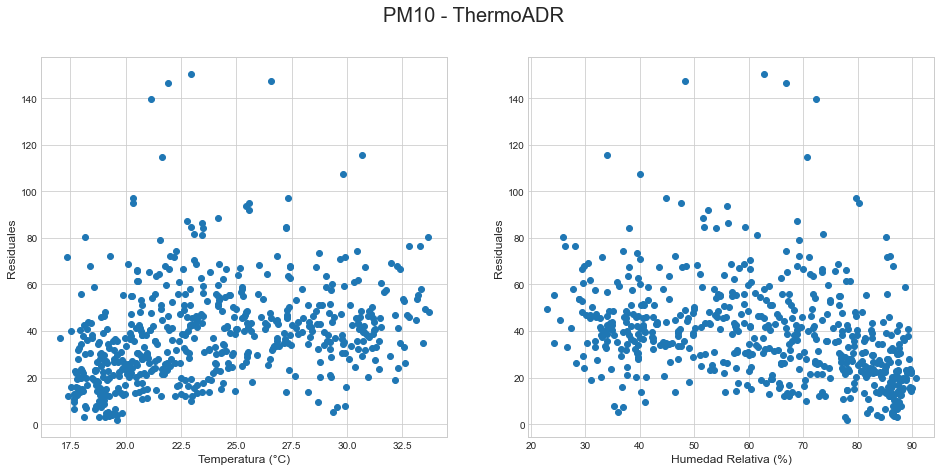

In [27]:
param = ['PM10']
for p in param:
    graph_residual(df_stfe, df_tr, p, 'ThermoADR', save=True)

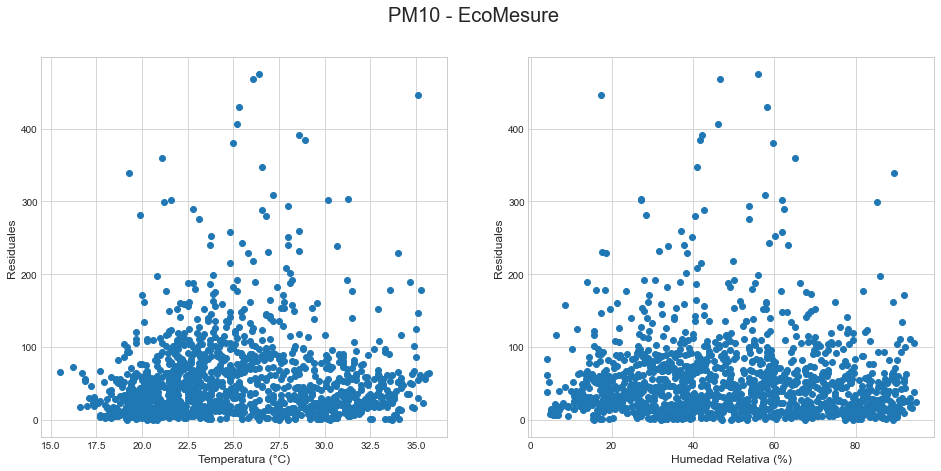

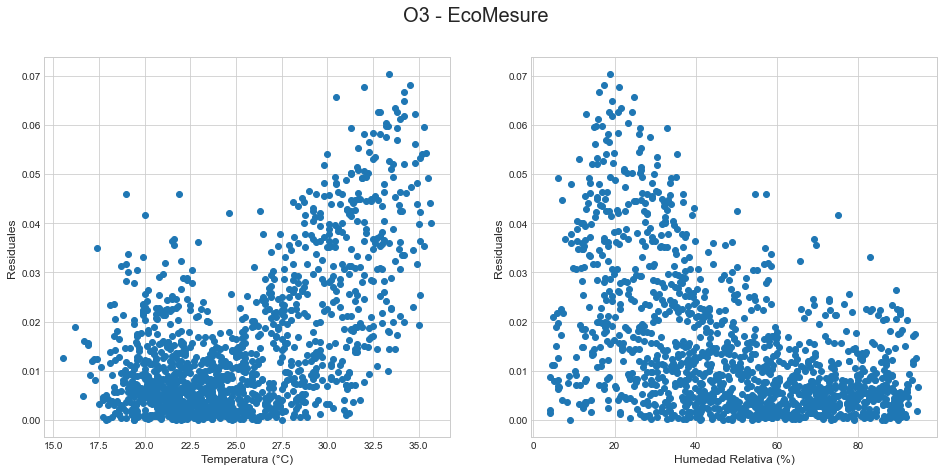

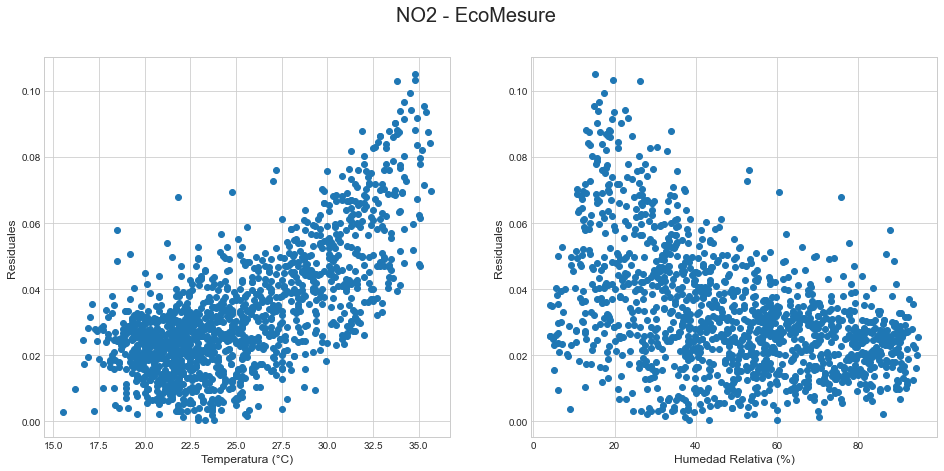

In [28]:
param = ['PM10','O3','NO2']
for p in param:
    graph_residual(df_simaj, df_ec, p, 'EcoMesure', save=True)

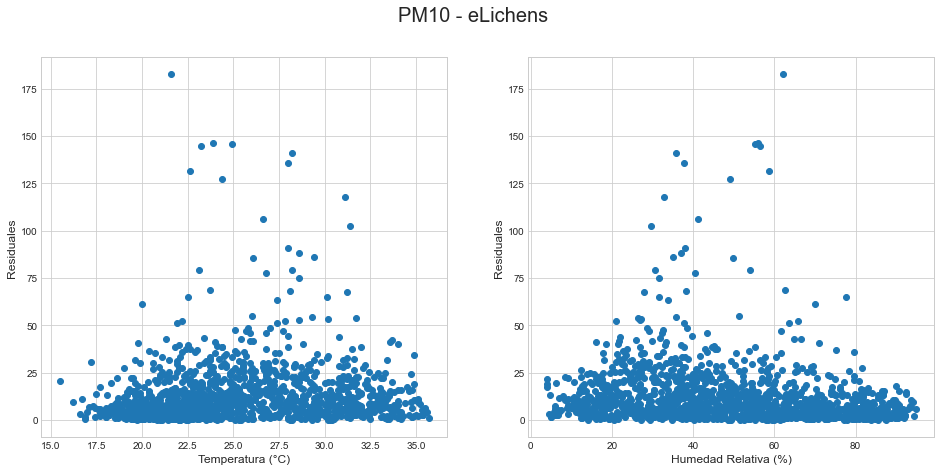

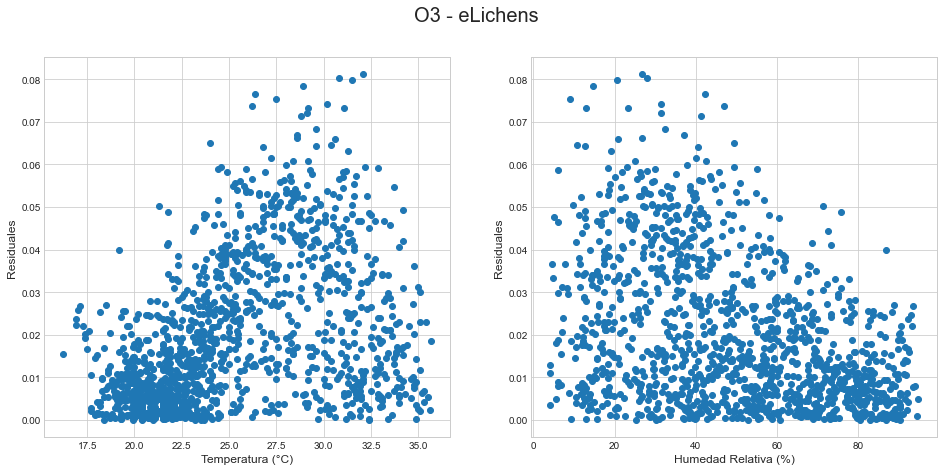

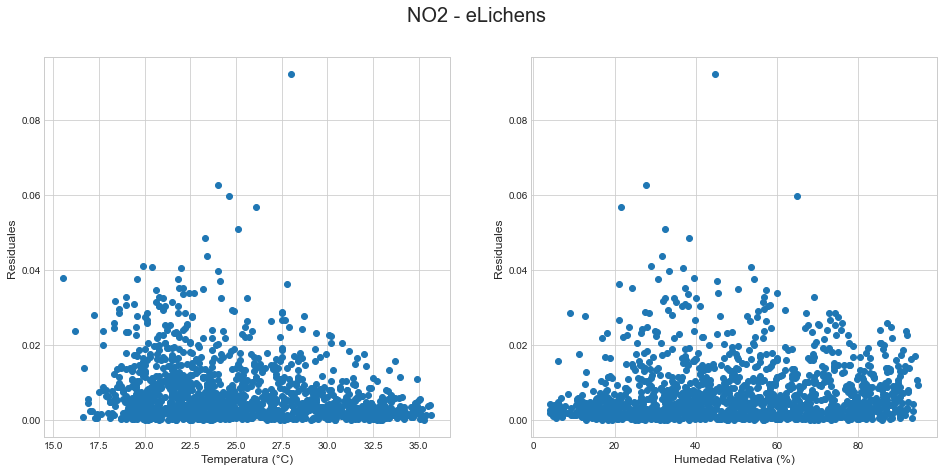

In [29]:
param = ['PM10','O3','NO2']
for p in param:
    graph_residual(df_simaj, df_el, p, 'eLichens', save=True)

# Distribution plot

In [30]:
def graph_distribution(df_simaj, df_electronic, param, name, save=False):
    fig, ax = plt.subplots(figsize=(10,7))
    
    sns.kdeplot(df_simaj[param], label='Simaj', bw_adjust=0.5, ax=ax)
    sns.kdeplot(df_electronic[param], label=name, bw_adjust=0.5, ax=ax)
    
    ax.legend()
    
    fig.suptitle(f'{param} - {name}', fontsize=20)
    
    if save==True:
        plt.savefig(f'../output/figures/lowcost_sensor/{name}_{param}_Distribution.png',dpi=150)

    return plt.show()

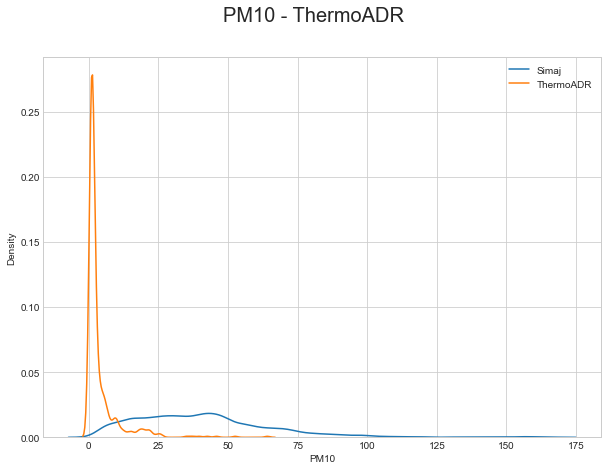

In [31]:
param = ['PM10']
for p in param:
    graph_distribution(df_stfe, df_tr, p, 'ThermoADR', save=True)

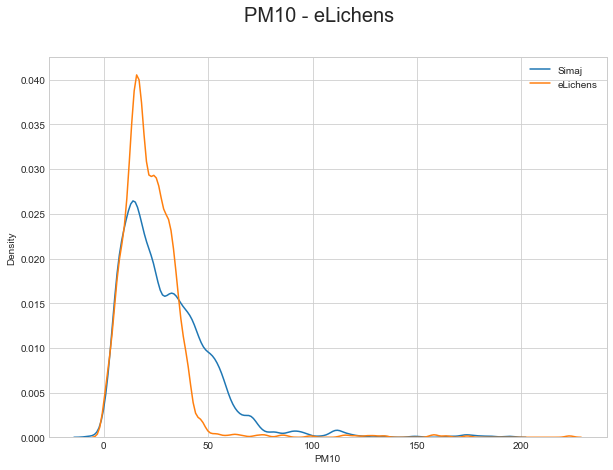

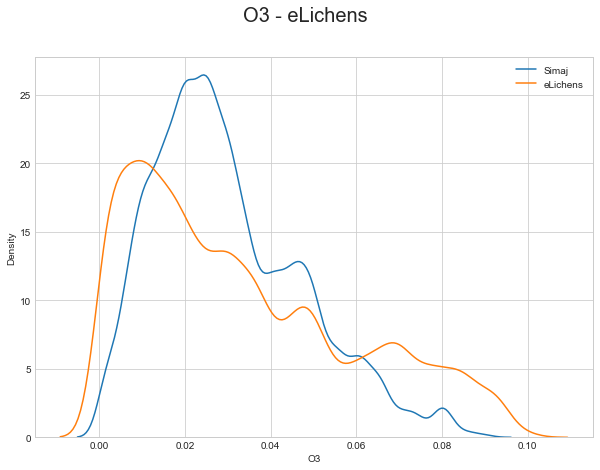

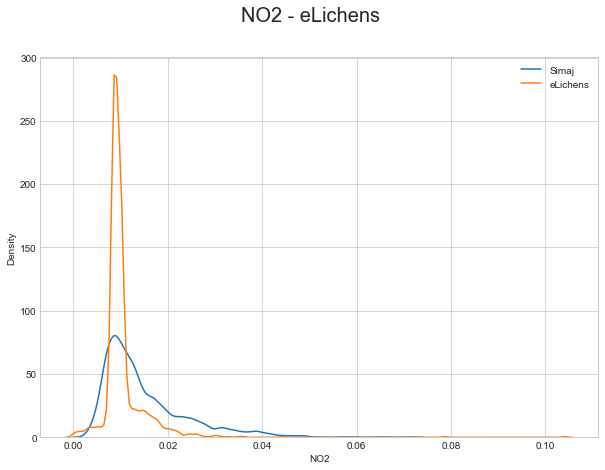

In [32]:
param = ['PM10','O3','NO2']
for p in param:
    graph_distribution(df_simaj, df_el, p, 'eLichens', save=True)